# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

# Creating dataframe

In [2]:
df = pd.read_csv("/assets/tvmarketing.csv")
l = [int(x) for x in range(0, 200)]
df.insert(0, "tid", l, True)
df.max()
df2 = df.sort_values(by=['Sales'])
df2 = df2.drop(columns=['tid'])
df2.insert(0, "tid", l, True)
df2.head()

,tid,TV,Sales
130,0,0.7,1.6
155,1,4.1,3.2
8,2,8.6,4.8
108,3,13.1,5.3
78,4,5.4,5.3


# Checking linearity

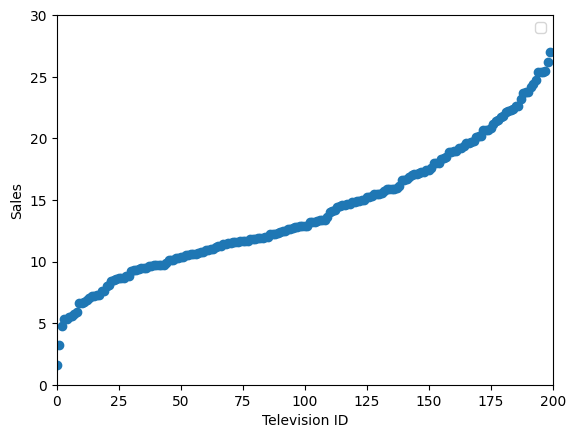

In [3]:
plt.scatter(df2['tid'], df2['Sales'])
plt.xlim(0, 200)
plt.ylim(0, 30)
plt.legend()
plt.xlabel("Television ID")
plt.ylabel("Sales")
plt.show()

# Checking correlation

<Axes: >

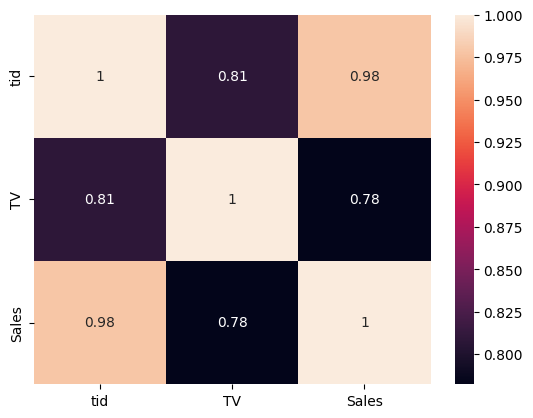

In [4]:
import seaborn as sb
correlation = df2.corr()
sb.heatmap(correlation, annot = True)

In [5]:
df2.head()
df2.info

<bound method DataFrame.info of      tid     TV  Sales
130    0    0.7    1.6
155    1    4.1    3.2
8      2    8.6    4.8
108    3   13.1    5.3
78     4    5.4    5.3
..   ...    ...    ...
98   195  289.7   25.4
147  196  243.2   25.4
198  197  283.6   25.5
183  198  287.6   26.2
175  199  276.9   27.0

[200 rows x 3 columns]>

# Modelling

In [11]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
regress = linear_model.LinearRegression()

train_x = np.asanyarray(df2["tid"])
train_y = np.asanyarray(df2["Sales"])

regress.fit(train_x.reshape(-1, 1), train_y.reshape(-1, 1))

print("Coefficients: ", regress.coef_)
print("Intercepts: ", regress.intercept_)

Coefficients:  [[0.08816103]]
Intercepts:  [5.25047761]


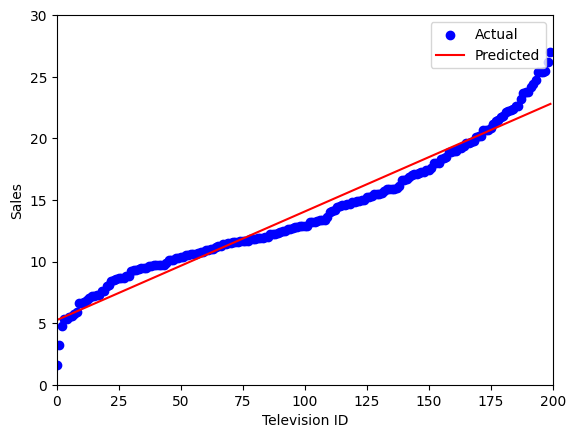

In [12]:
plt.scatter(df2.tid, df2.Sales, color = "blue", label = "Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.xlim(0, 200)
plt.ylim(0, 30)
plt.legend()
plt.xlabel("Television ID")
plt.ylabel("Sales")
plt.show()

## Finding errors

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_x.reshape(-1, 1), train_y.reshape(-1, 1), test_size=0.2, random_state=42)
y_pred = regress.predict(X_test)

In [16]:
# Squared error
squared_error = metrics.mean_squared_error(y_test, y_pred)
print(f"Squared Error: {squared_error}")

# Mean squared error
mean_squared_error = np.sqrt(squared_error)
print(f"Mean Squared Error: {mean_squared_error}")

# Absolute error
absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(f"Absolute Error: {absolute_error}")

# Mean absolute error
mean_absolute_error = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mean_absolute_error}")

# R^2
r2 = metrics.r2_score(y_test, y_pred)
print(f"R^2: {r2}")

# Adjusted R^2
n = len(X_test)
p = 1
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R^2: {adjusted_r2}")

Squared Error: 0.5705017993220854
Mean Squared Error: 0.7553156951381889
Absolute Error: 0.6508100277506943
Mean Absolute Error: 0.6508100277506943
R^2: 0.9690834784460454
Adjusted R^2: 0.9682698857735729
